Visualise alignment results as graph

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import sys
basedir = '/home/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [19]:
import numpy as np
import pylab as plt
import pandas as pd
from scipy.stats import ttest_rel

import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip

In [20]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

In [21]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old'
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old/ground_truth/ground_truth.txt'

In [22]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 5
hp.within_file_rt_tol = 30
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1.0
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 5000
hp.rt_clustering_nsamps = 500
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=5000, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=500, second_stage_clustering_use_adduct_likelihood=True, second_stage_clustering_use_mass_likelihood=True, second_stage_clustering_use_rt_likelihood=True, t=0.0, within_file_mass_tol=5, within_file_rt_tol=30


In [23]:
exp_results_3b_q2 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_3.p


In [24]:
exp_results_3b_q3 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_3_q3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_3_q3.p


In [25]:
ac1 = load_clustering('pickles/cc_3a.p')

Loaded from pickles/cc_3a.p


In [35]:
df = evaluate_performance(hp, ac1, gt_file, 2)
df_2 = evaluate_performance(hp, ac1, gt_file, 3, q=2)
df_3 = evaluate_performance(hp, ac1, gt_file, 3, q=3)

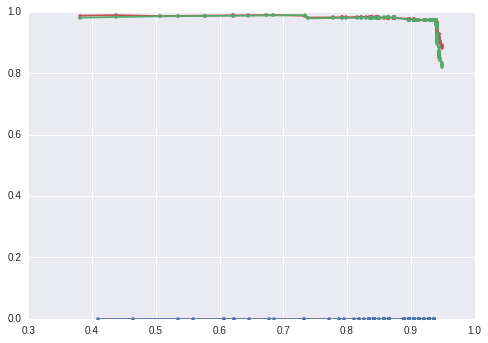

In [36]:
plt.plot(df.Rec, df_2.Prec, '.r-')    
plt.plot(df_2.Rec, df_3.Prec, '.g-')    
plt.plot(df_3.Rec, df_4.Prec, '.b-')

,mass_tol,rt_tol,TP,FP,FN,Prec,Rec,F1,Threshold
0,2,5,137,4,291,0.971631,0.320093,0.481547,1
1,2,10,293,6,135,0.979933,0.684579,0.806052,1
2,2,15,332,8,96,0.976471,0.775701,0.864583,1
3,2,20,360,11,68,0.970350,0.841121,0.901126,1
4,2,25,374,11,54,0.971429,0.873832,0.920049,1
5,2,30,386,11,42,0.972292,0.901869,0.935758,1
6,2,35,387,11,41,0.972362,0.904206,0.937046,1
7,2,40,387,11,41,0.972362,0.904206,0.937046,1
8,2,45,392,11,36,0.972705,0.915888,0.943442,1
9,2,50,392,11,36,0.972705,0.915888,0.943442,1


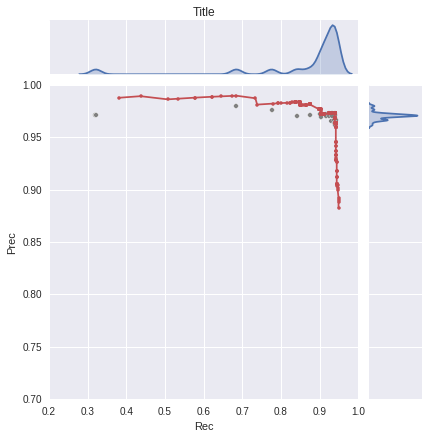

In [50]:
plot_scatter(exp_results_3b_q2, 0, df_2, 'Title')

In [38]:
def get_thresholded_performances(df):
    for t in np.arange(0.70, 0.99, 0.10):
        row = df.loc[(df["Threshold"] > t)].iloc[0]  
        print "t=%.2f prec=%.2f rec=%.2f f1=%.2f" % (row['Threshold'], row['Prec'], row['Rec'], row['F1'])

In [39]:
get_thresholded_performances(df_2)

t=0.70 prec=0.97 rec=0.90 f1=0.94
t=0.80 prec=0.97 rec=0.90 f1=0.94
t=0.90 prec=0.98 rec=0.85 f1=0.91


In [40]:
get_thresholded_performances(df_3)

t=0.70 prec=0.97 rec=0.90 f1=0.93
t=0.80 prec=0.97 rec=0.90 f1=0.93
t=0.90 prec=0.98 rec=0.84 f1=0.91
